In [328]:
# loading required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [329]:
# loading the dataset
data = pd.read_csv('cleaned_datasets/dataset_1.csv')
data.head()

,area_code,area,year_code,year,item_code,item,producer_price_index,area_harvested,production,yield,...,value_added_aff_per_total_fdi,area_code_m49,region,sub_region,european_union_country,least_developed_country,land_locked_developing_country,small_island_developing_state,low_income_food_deficit_country,net_food_importing_developing_country
0,1,Armenia,2001,2001,15,Wheat,74.51,108554.0,241679.0,2226.3,...,6.091945,51,Asia,Western Asia,0.0,0.0,1.0,0.0,0.0,0.0
1,1,Armenia,2002,2002,15,Wheat,64.25,119224.0,284670.0,2387.7,...,3.889558,51,Asia,Western Asia,0.0,0.0,1.0,0.0,0.0,0.0
2,1,Armenia,2003,2003,15,Wheat,86.45,126112.0,216698.0,1718.3,...,2.136457,51,Asia,Western Asia,0.0,0.0,1.0,0.0,0.0,0.0
3,1,Armenia,2004,2004,15,Wheat,89.86,124511.0,291556.0,2341.6,...,2.605379,51,Asia,Western Asia,0.0,0.0,1.0,0.0,0.0,0.0
4,1,Armenia,2005,2005,15,Wheat,66.26,127574.0,258361.0,2025.2,...,2.699758,51,Asia,Western Asia,0.0,0.0,1.0,0.0,0.0,0.0


In [330]:
data.shape

(155474, 106)

In [331]:
prop_na = data.isna().mean().sort_values(ascending=False)*100
prop_na.head(20)

aoi_credit_to_ag_forest_fish                   32.261986
credit_to_ag_forest_fish_share_total_credit    32.261986
credit_to_ag_forest_fish                       32.261986
govt_expenditure_on_ag_forest_fish             32.141065
gross_production_value                         27.499132
export_quantity                                26.794834
export_value                                   26.717651
afs_employment_share_in_total_employment       25.504586
phosphorus_production                          25.049848
total_credit                                   24.631128
import_quantity                                23.970567
import_value                                   23.950628
total_employment_afs                           23.093894
nitrogen_production                            22.921517
gross_production_index                         14.325225
yield                                          12.410435
area_harvested                                 11.865650
value_added_per_worker         

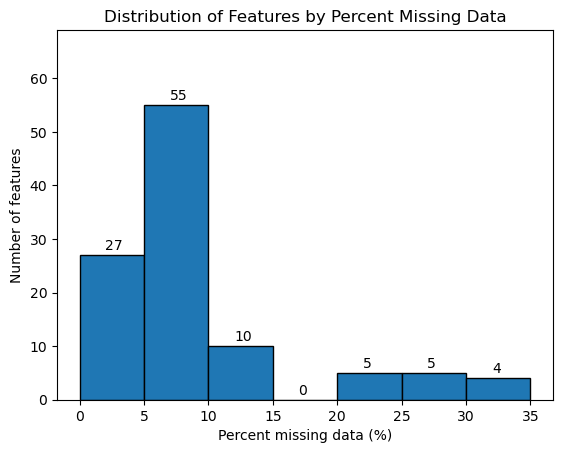

In [332]:
plt.figure()
counts, edges, bars = plt.hist(prop_na, edgecolor='black', bins = np.arange(0,40,5))
plt.title('Distribution of Features by Percent Missing Data')
plt.xlabel('Percent missing data (%)')
plt.ylabel('Number of features')
plt.ylim(0,60*1.15)

# adding frequency labels on bars
for count, edge in zip(counts, edges[:-1]):
    plt.text(edge+2, count+1, str(int(count)))

plt.show()

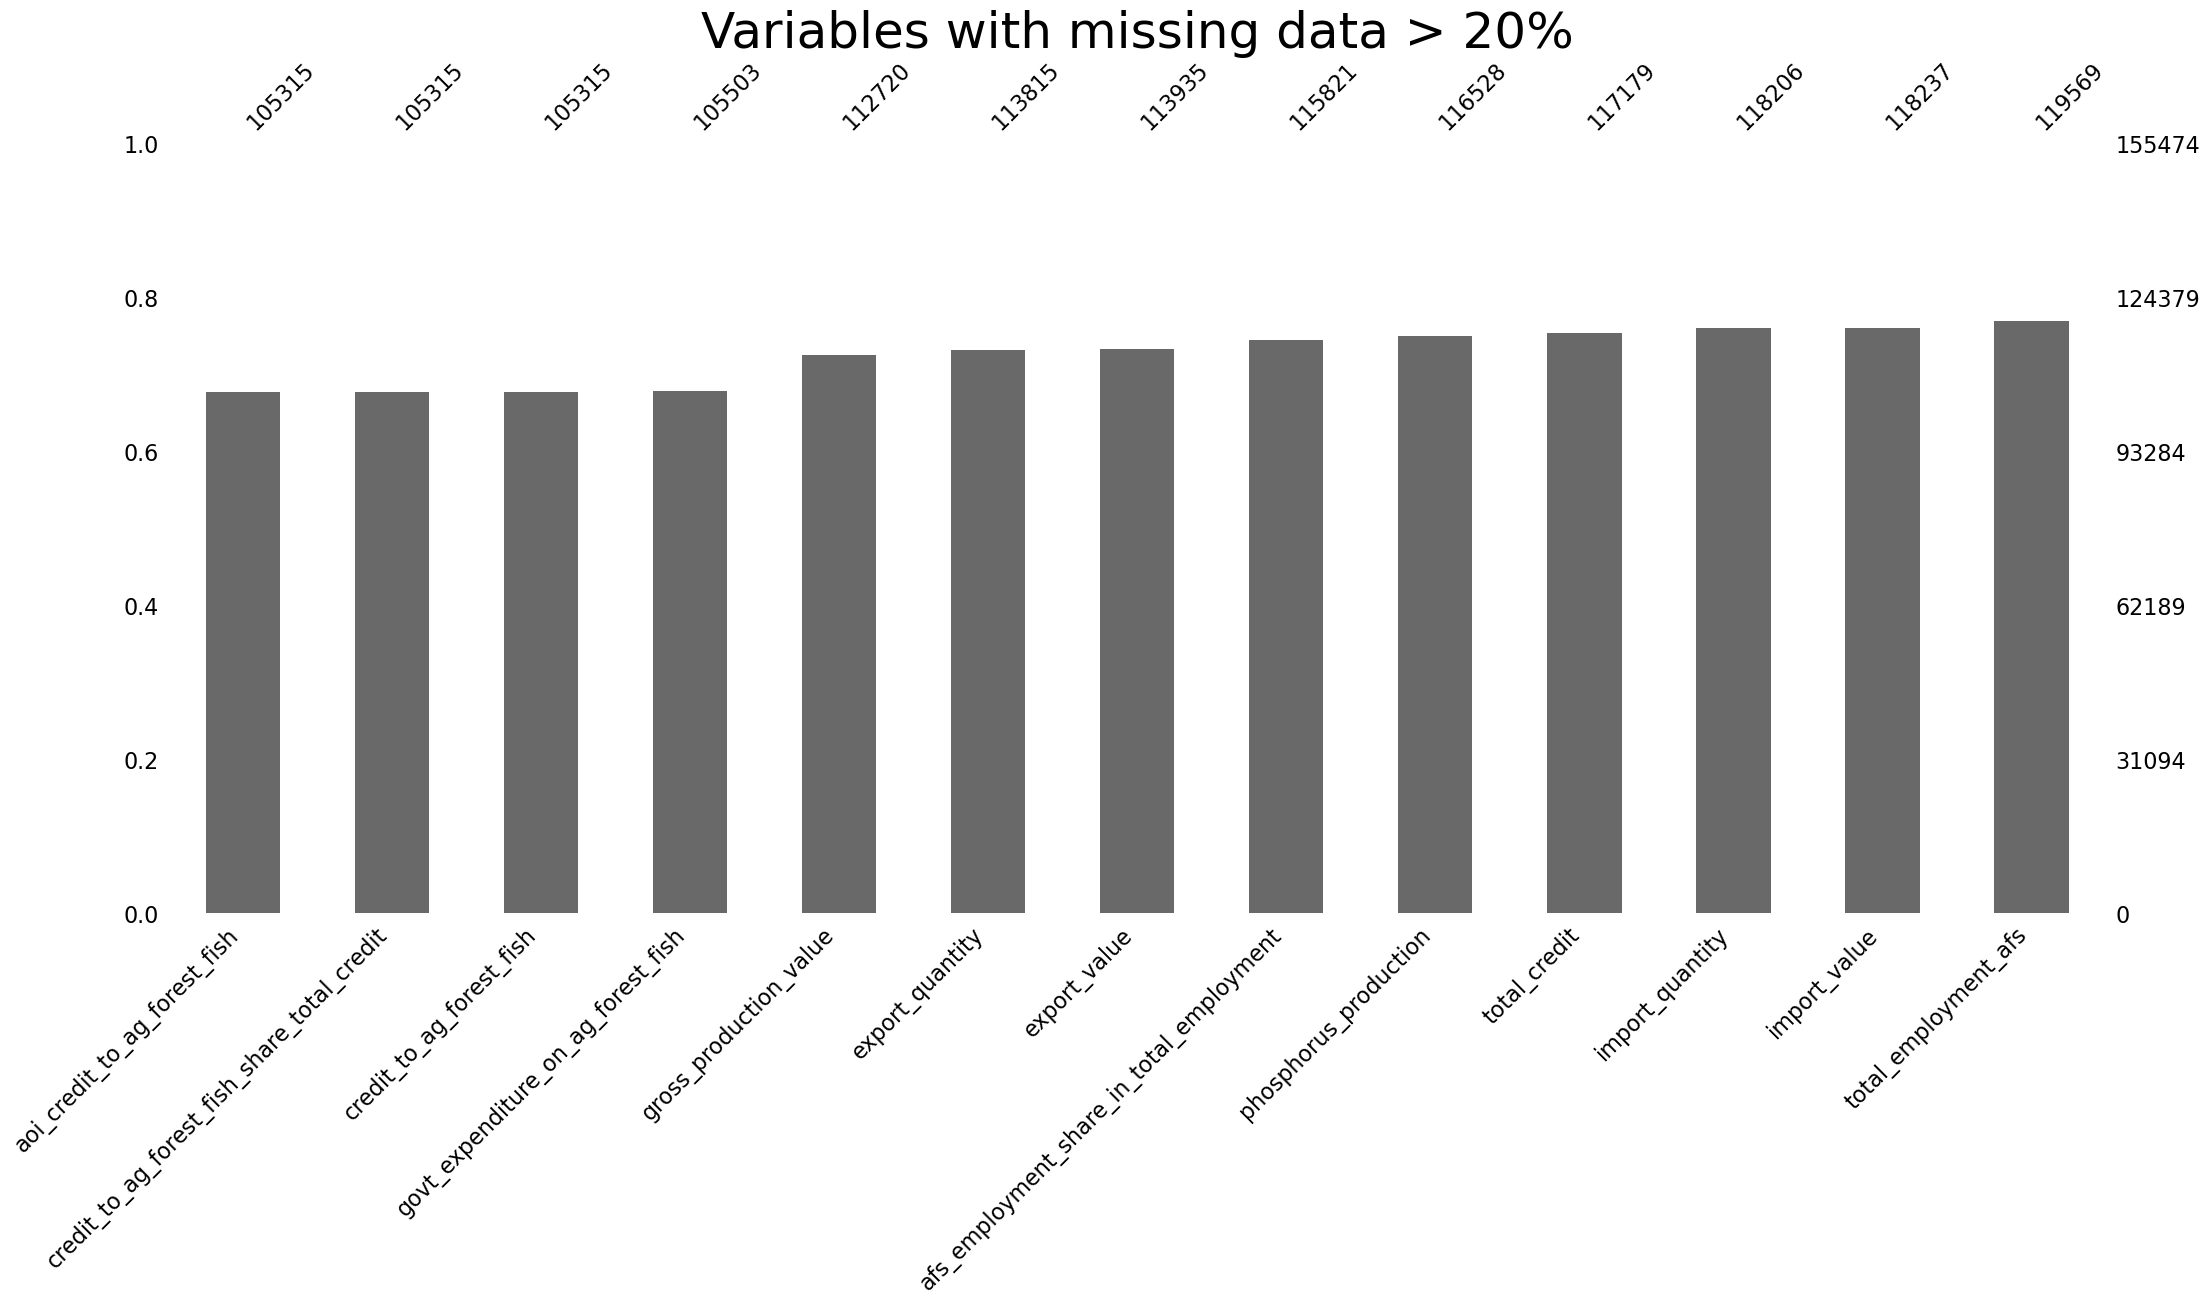

In [314]:
top_13_missing = prop_na.head(13).index
plt.figure()
miss_plot = msno.bar(data[top_13_missing])
plt.title('Variables with missing data > 20%', fontsize=36)
plt.show()

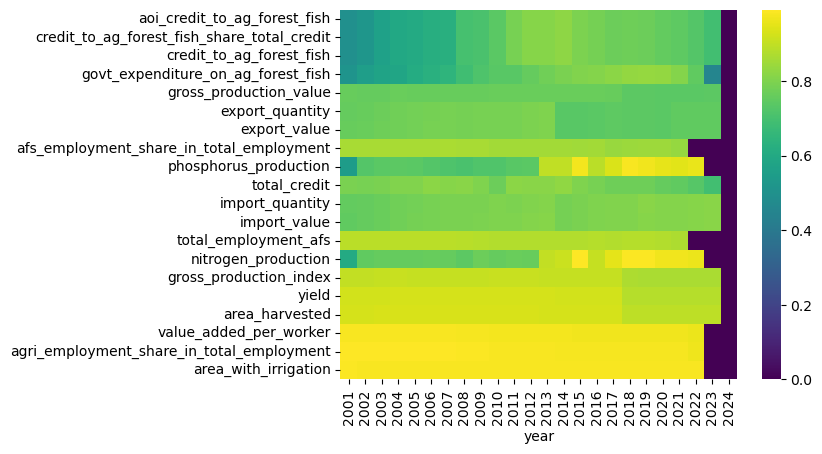

In [315]:
top_20_missing = prop_na.head(20).index
coverage_by_year = (
    data.groupby('year')[top_20_missing].apply(lambda x: 1 - x.isna().mean())
)
plt.figure()
miss_heatmap = sns.heatmap(coverage_by_year.T, cmap='viridis')
plt.show()

In [333]:
df = data.loc[data['year']<2024]
df['year'].nunique()

23

In [334]:
print(prop_na['producer_price_index'])

0.33510426180583247


In [338]:
df.loc[df['producer_price_index'].isna()].shape[0]

521

## Data Imputation

In [318]:
df_1 = df.copy()

In [319]:
train_temp_df = df_1.loc[df['year'] <= 2021]
train_temp_df['year'].dtype

dtype('int64')

In [320]:
cols_area_and_item_dependent = [
    'export_quantity', 'export_value', 'import_quantity',
    'import_value', 'area_harvested', 'production', 'yield',
    'gross_production_value', 'gross_production_index', 'producer_price_index'
]

all_cols = train_temp_df.columns.to_list()

cols_area_dependent = list(set(all_cols) - set(cols_area_and_item_dependent))
len(cols_area_dependent)

96

In [321]:
df_area_year = train_temp_df.groupby(['area', 'year'], as_index=False)['employment_in_agri'].mean()
df_area_year['area'].value_counts().tail(20)

area
Fiji                                21
El Salvador                         21
Estonia                             21
Ethiopia                            21
Maldives                            20
Zambia                              17
Zimbabwe                            17
Serbia                              16
Chad                                15
Timor-Leste                         14
Saint Vincent and the Grenadines    14
Seychelles                          14
Grenada                             12
Angola                              12
Oman                                11
Sierra Leone                        11
Samoa                               10
New Caledonia                        7
Saint Kitts and Nevis                7
Bahrain                              5
Name: count, dtype: int64

While starting on our journey to impute missing data for the country-dpendent variables, 
we notice that for a few countries, data is available for just 5-10 years in the 
training period. 

That entice us to look further into these countries, what is happenening?

In [324]:
train_temp_df.loc[train_temp_df['area']=='Bahrain'][0:20]

,area_code,area,year_code,year,item_code,item,producer_price_index,area_harvested,production,yield,...,value_added_aff_per_total_fdi,area_code_m49,region,sub_region,european_union_country,least_developed_country,land_locked_developing_country,small_island_developing_state,low_income_food_deficit_country,net_food_importing_developing_country
8370,13,Bahrain,2017,2017,116,Potatoes,NaN,2.0,75.0,37500.0,...,0.077209,48,Asia,Western Asia,0.0,0.0,0.0,0.0,0.0,0.0
8371,13,Bahrain,2018,2018,116,Potatoes,NaN,2.0,85.0,42500.0,...,0.070142,48,Asia,Western Asia,0.0,0.0,0.0,0.0,0.0,0.0
8372,13,Bahrain,2019,2019,116,Potatoes,NaN,1.0,30.0,30000.0,...,0.078662,48,Asia,Western Asia,0.0,0.0,0.0,0.0,0.0,0.0
8373,13,Bahrain,2020,2020,116,Potatoes,NaN,1.0,30.0,30000.0,...,0.108859,48,Asia,Western Asia,0.0,0.0,0.0,0.0,0.0,0.0
8374,13,Bahrain,2017,2017,122,Sweet potatoes,NaN,NaN,NaN,NaN,...,0.077209,48,Asia,Western Asia,0.0,0.0,0.0,0.0,0.0,0.0
8375,13,Bahrain,2018,2018,122,Sweet potatoes,NaN,NaN,NaN,NaN,...,0.070142,48,Asia,Western Asia,0.0,0.0,0.0,0.0,0.0,0.0
8376,13,Bahrain,2019,2019,122,Sweet potatoes,NaN,NaN,NaN,NaN,...,0.078662,48,Asia,Western Asia,0.0,0.0,0.0,0.0,0.0,0.0
8377,13,Bahrain,2020,2020,122,Sweet potatoes,NaN,NaN,NaN,NaN,...,0.108859,48,Asia,Western Asia,0.0,0.0,0.0,0.0,0.0,0.0
8378,13,Bahrain,2021,2021,122,Sweet potatoes,NaN,NaN,NaN,NaN,...,0.074112,48,Asia,Western Asia,0.0,0.0,0.0,0.0,0.0,0.0
8379,13,Bahrain,2017,2017,358,Cabbages,NaN,23.0,670.0,29130.4,...,0.077209,48,Asia,Western Asia,0.0,0.0,0.0,0.0,0.0,0.0


In [326]:
train_temp_df.loc[
    (train_temp_df['area']=='Bahrain') & (train_temp_df['producer_price_index'].notna())
    ].shape[0]

0

For the country Bahrain, time series starts from 2017 for all the items and the 
response or target variable 'producer_price_index' is missing for all of these 
items throughout the time series. 

Well, thats a problem. We should be dropping this country from our dataset. Because 
imputing the target variable throughout for Bahrain would definitely won't help.

Let's look at some other countries to look for patterns, based on which we would decide 
what to do next.

In [366]:
train_temp_df.loc[train_temp_df['area']=='Saint Kitts and Nevis'][0:15]

,area_code,area,year_code,year,item_code,item,producer_price_index,area_harvested,production,yield,...,value_added_aff_per_total_fdi,area_code_m49,region,sub_region,european_union_country,least_developed_country,land_locked_developing_country,small_island_developing_state,low_income_food_deficit_country,net_food_importing_developing_country
119236,188,Saint Kitts and Nevis,2017,2017,56,Maize (corn),NaN,NaN,NaN,NaN,...,0.158271,659,Americas,Carribean,0.0,0.0,0.0,1.0,0.0,1.0
119237,188,Saint Kitts and Nevis,2018,2018,56,Maize (corn),NaN,NaN,NaN,NaN,...,0.186339,659,Americas,Carribean,0.0,0.0,0.0,1.0,0.0,1.0
119238,188,Saint Kitts and Nevis,2019,2019,56,Maize (corn),NaN,NaN,NaN,NaN,...,0.188554,659,Americas,Carribean,0.0,0.0,0.0,1.0,0.0,1.0
119239,188,Saint Kitts and Nevis,2015,2015,122,Sweet potatoes,84.02,23.0,128.0,5565.2,...,0.061938,659,Americas,Carribean,0.0,0.0,0.0,1.0,0.0,1.0
119240,188,Saint Kitts and Nevis,2016,2016,122,Sweet potatoes,115.98,29.0,182.0,6377.1,...,0.057541,659,Americas,Carribean,0.0,0.0,0.0,1.0,0.0,1.0
119241,188,Saint Kitts and Nevis,2017,2017,122,Sweet potatoes,112.02,25.0,172.0,6989.7,...,0.158271,659,Americas,Carribean,0.0,0.0,0.0,1.0,0.0,1.0
119242,188,Saint Kitts and Nevis,2018,2018,122,Sweet potatoes,112.02,22.0,149.0,6825.1,...,0.186339,659,Americas,Carribean,0.0,0.0,0.0,1.0,0.0,1.0
119243,188,Saint Kitts and Nevis,2019,2019,122,Sweet potatoes,112.02,46.0,305.5,6690.2,...,0.188554,659,Americas,Carribean,0.0,0.0,0.0,1.0,0.0,1.0
119244,188,Saint Kitts and Nevis,2020,2020,122,Sweet potatoes,111.32,25.0,159.6,6323.6,...,-15.845493,659,Americas,Carribean,0.0,0.0,0.0,1.0,0.0,1.0
119245,188,Saint Kitts and Nevis,2021,2021,122,Sweet potatoes,111.78,29.0,175.5,5964.1,...,0.338003,659,Americas,Carribean,0.0,0.0,0.0,1.0,0.0,1.0


For the country 'Saint Kitts and Nevis', there is no item related data for the 'Maize' 
crop. Other items looks fine.

In [357]:
train_temp_df.loc[train_temp_df['area']=='New Caledonia'][0:20]

,area_code,area,year_code,year,item_code,item,producer_price_index,area_harvested,production,yield,...,value_added_aff_per_total_fdi,area_code_m49,region,sub_region,european_union_country,least_developed_country,land_locked_developing_country,small_island_developing_state,low_income_food_deficit_country,net_food_importing_developing_country
97546,153,New Caledonia,2018,2018,15,Wheat,NaN,8.0,4.4,522.4,...,0.739198,540,Oceania,Melanesia,0.0,0.0,0.0,1.0,0.0,0.0
97547,153,New Caledonia,2019,2019,15,Wheat,NaN,184.0,109.0,592.8,...,0.376074,540,Oceania,Melanesia,0.0,0.0,0.0,1.0,0.0,0.0
97548,153,New Caledonia,2020,2020,15,Wheat,NaN,105.0,53.6,509.4,...,0.538395,540,Oceania,Melanesia,0.0,0.0,0.0,1.0,0.0,0.0
97549,153,New Caledonia,2021,2021,15,Wheat,NaN,150.0,84.5,561.8,...,0.467417,540,Oceania,Melanesia,0.0,0.0,0.0,1.0,0.0,0.0
97551,153,New Caledonia,2018,2018,27,Rice,NaN,NaN,NaN,NaN,...,0.739198,540,Oceania,Melanesia,0.0,0.0,0.0,1.0,0.0,0.0
97552,153,New Caledonia,2019,2019,27,Rice,NaN,NaN,NaN,NaN,...,0.376074,540,Oceania,Melanesia,0.0,0.0,0.0,1.0,0.0,0.0
97553,153,New Caledonia,2016,2016,56,Maize (corn),100.00,1016.0,8543.0,8408.5,...,0.348583,540,Oceania,Melanesia,0.0,0.0,0.0,1.0,0.0,0.0
97554,153,New Caledonia,2017,2017,56,Maize (corn),99.99,1045.0,9415.2,9009.8,...,0.445259,540,Oceania,Melanesia,0.0,0.0,0.0,1.0,0.0,0.0
97555,153,New Caledonia,2018,2018,56,Maize (corn),99.99,1109.0,10184.0,9183.5,...,0.739198,540,Oceania,Melanesia,0.0,0.0,0.0,1.0,0.0,0.0
97556,153,New Caledonia,2019,2019,56,Maize (corn),100.01,964.0,8842.0,9169.6,...,0.376074,540,Oceania,Melanesia,0.0,0.0,0.0,1.0,0.0,0.0


Similarly, for the country 'New Caledonia', there are a few items like wheat, rice, 
and sorghum for which we are missing response variable data and interestingly, 
for sorghum there is just one instance which is the year 2018. 

In [360]:
train_temp_df.loc[train_temp_df['area']=='Samoa'][40:60]

,area_code,area,year_code,year,item_code,item,producer_price_index,area_harvested,production,yield,...,value_added_aff_per_total_fdi,area_code_m49,region,sub_region,european_union_country,least_developed_country,land_locked_developing_country,small_island_developing_state,low_income_food_deficit_country,net_food_importing_developing_country
150181,244,Samoa,2012,2012,497,Lemons and limes,91.32,NaN,NaN,NaN,...,3.401699,882,Oceania,Polynesia,0.0,0.0,0.0,1.0,0.0,1.0
150182,244,Samoa,2013,2013,497,Lemons and limes,88.35,NaN,NaN,NaN,...,5.133535,882,Oceania,Polynesia,0.0,0.0,0.0,1.0,0.0,1.0
150183,244,Samoa,2014,2014,497,Lemons and limes,78.30,NaN,NaN,NaN,...,3.152236,882,Oceania,Polynesia,0.0,0.0,0.0,1.0,0.0,1.0
150184,244,Samoa,2015,2015,497,Lemons and limes,134.33,NaN,NaN,NaN,...,2.604457,882,Oceania,Polynesia,0.0,0.0,0.0,1.0,0.0,1.0
150185,244,Samoa,2016,2016,497,Lemons and limes,87.37,NaN,NaN,NaN,...,29.621512,882,Oceania,Polynesia,0.0,0.0,0.0,1.0,0.0,1.0
150186,244,Samoa,2017,2017,497,Lemons and limes,466.75,NaN,NaN,NaN,...,9.077860,882,Oceania,Polynesia,0.0,0.0,0.0,1.0,0.0,1.0
150187,244,Samoa,2018,2018,497,Lemons and limes,522.64,NaN,NaN,NaN,...,4.251227,882,Oceania,Polynesia,0.0,0.0,0.0,1.0,0.0,1.0
150188,244,Samoa,2019,2019,497,Lemons and limes,660.80,NaN,NaN,NaN,...,-16.347227,882,Oceania,Polynesia,0.0,0.0,0.0,1.0,0.0,1.0
150189,244,Samoa,2020,2020,497,Lemons and limes,603.87,NaN,NaN,NaN,...,16.115577,882,Oceania,Polynesia,0.0,0.0,0.0,1.0,0.0,1.0
150190,244,Samoa,2021,2021,497,Lemons and limes,584.53,NaN,NaN,NaN,...,8.081359,882,Oceania,Polynesia,0.0,0.0,0.0,1.0,0.0,1.0


In [364]:
train_temp_df.loc[train_temp_df['area']=='Sierra Leone'][0:15]

,area_code,area,year_code,year,item_code,item,producer_price_index,area_harvested,production,yield,...,value_added_aff_per_total_fdi,area_code_m49,region,sub_region,european_union_country,least_developed_country,land_locked_developing_country,small_island_developing_state,low_income_food_deficit_country,net_food_importing_developing_country
121276,197,Sierra Leone,2011,2011,27,Rice,65.72,603924.0,1129338.00,1870.0,...,1.855552,694,Africa,Western Africa,0.0,1.0,0.0,0.0,1.0,1.0
121277,197,Sierra Leone,2012,2012,27,Rice,65.72,717872.0,1141417.00,1590.0,...,2.843726,694,Africa,Western Africa,0.0,1.0,0.0,0.0,1.0,1.0
121278,197,Sierra Leone,2013,2013,27,Rice,87.63,671422.0,1255559.00,1870.0,...,5.359653,694,Africa,Western Africa,0.0,1.0,0.0,0.0,1.0,1.0
121279,197,Sierra Leone,2014,2014,27,Rice,87.63,741664.0,1204020.00,1623.4,...,6.033039,694,Africa,Western Africa,0.0,1.0,0.0,0.0,1.0,1.0
121280,197,Sierra Leone,2015,2015,27,Rice,87.63,604930.0,871693.00,1441.0,...,9.887634,694,Africa,Western Africa,0.0,1.0,0.0,0.0,1.0,1.0
121281,197,Sierra Leone,2016,2016,27,Rice,124.74,765335.0,875304.00,1143.7,...,16.008824,694,Africa,Western Africa,0.0,1.0,0.0,0.0,1.0,1.0
121282,197,Sierra Leone,2017,2017,27,Rice,123.23,780642.0,897087.00,1149.2,...,5.223859,694,Africa,Western Africa,0.0,1.0,0.0,0.0,1.0,1.0
121283,197,Sierra Leone,2018,2018,27,Rice,123.56,1169418.0,918713.00,785.6,...,9.467657,694,Africa,Western Africa,0.0,1.0,0.0,0.0,1.0,1.0
121284,197,Sierra Leone,2019,2019,27,Rice,135.77,601748.0,947464.00,1574.5,...,6.923059,694,Africa,Western Africa,0.0,1.0,0.0,0.0,1.0,1.0
121285,197,Sierra Leone,2020,2020,27,Rice,150.84,604407.0,1049795.00,1736.9,...,14.182201,694,Africa,Western Africa,0.0,1.0,0.0,0.0,1.0,1.0


For the countries like 'Samoa' and 'Sierra Leone', the time series starts at the 
year 2012 and 2011 respectively, but the time series mostly look complete.

So, we have found some interesting patterns in the data availability and missingness 
for certain country-item pairs. We decided to remove those country-item pairs 
that are:

1. missing target variable (producer_price_index) data completely for the series.
2. missing target variable data for >50% of the time series.
3. missing item-related data from the variables- 'area_harvested', 'production', 'yield' for >50% of the time series.
4. missing data for the target variable during the either 1 or both of the years from 2022 to 2023.
5. having no instance for the years 2022 and 2023. 

In [368]:
df.shape

(148889, 106)

In [380]:
unique_pairs = df[['area', 'item']].drop_duplicates().reset_index(drop=True)
unique_pairs.head()

,area,item
0,Armenia,Wheat
1,Armenia,Barley
2,Armenia,Maize (corn)
3,Armenia,Rye
4,Armenia,Oats


In [381]:
unique_pairs.shape[0]

6753

In [389]:
unique_pairs.to_numpy()[0:5]

array([['Armenia', 'Wheat'],
       ['Armenia', 'Barley'],
       ['Armenia', 'Maize (corn)'],
       ['Armenia', 'Rye'],
       ['Armenia', 'Oats']], dtype=object)

In [401]:
"""
Long Approach for creating list of unique pairs:

unique_pairs_list = []
for idx in range(unique_pairs.shape[0]):
    pair = (unique_pairs.iloc[idx]['area'], unique_pairs.iloc[idx]['item'])
    unique_pairs_list.append(pair)

unique_pairs_list
"""
unique_pairs_list = [tuple(x) for x in unique_pairs[['area', 'item']].to_numpy()]
unique_pairs_list[0:5]

[('Armenia', 'Wheat'),
 ('Armenia', 'Barley'),
 ('Armenia', 'Maize (corn)'),
 ('Armenia', 'Rye'),
 ('Armenia', 'Oats')]

I am working on a multi-panel time series dataset comprised of various FAOSTAT datasets to forecast producer price index for a particular crop in a country. The dataset has 155474 rows and 106 columns. The column named 'area' represents country and has 149 unique values. And the column named 'item' has 134 unique values representing different agricultural commodities. The variables include diverse array of features- 

Time series range from 2001 to 2023. 
All countries dont have all the items and different countries have variable amount of data on different co-variates on the given time stamps. The missing data varies from 0 to 32 % among these co-variates. We need to impute data in these variables. 
64 columns have missingness below 10%, 10 columns have missingness between 10-15% and 14 columns have missingness between 20-32%. Remaining columns have no missing data. 
Out of 106 variables 10 are dependent on both country and item. For example, columns like 'area_harvested', 'yield', 'gross_production_value', etc. Remaining columns are just country dependent like- 'employment_in_agri', 'total_govt_expenditure', 'area_cropland', 'gross_domestic_product', etc. 
Our ultimate goal is to forecast PPI values using ML models or DL/NN models. I want to train the model on data from 2001-2021, validation on 2022, and test on 2023. For that we need to create lag features on response as well on covariates with low missing data.

However, first we have to impute the missingness in the covariates. Also, remember that around 650 rows has missing PPI response variables. We need to take into account how to deal with these as well because simply deleting these rows will disrupt the continuity of time series.

Act as an expert and guide me to build a ste-by-step strategy to successfully impute the missing data. 
Remember that for a given variable that is country-dependent, there are 4 possibilities in terms of missingness. For certain countries:
1). data missing at the beginning of the time series as a block
2). data missing in the middle of time series as a block,
3). data missing towards the end of the time series,
4). missingness interspersed as gaps in the times series.



Okay, so now its time to impute the missing values in the dataset. Missingness 
varies from 0-32% in our dataset for different variables. We would first divide 
the variables with missing data into three groups (<10%; 10-20%; >20%) and handle 
them step-by-step using the appropriate data imputation methods that respect the 
temporal structure within each country-item pair.  

In [236]:
col_group_1 = prop_na.loc[(prop_na<=10) & (prop_na>0)].index.to_list()
len(col_group_1)

64

In [237]:
col_group_2 = prop_na.loc[(prop_na>10)&(prop_na<=20)].index.to_list()
len(col_group_2)

10

In [238]:
col_group_3 = prop_na.loc[prop_na>20].index.to_list()
len(col_group_3)

14

### Data Imputation (Group-1, <10% NaN)

In [239]:
col_group_1[0:10]

['phosphorus_use_per_capita',
 'phosphorus_use_per_value_of_ag_production',
 'phosphorus_agri_use',
 'phosphorus_use_per_area_of_cropland',
 'production',
 'emission_share_livestock',
 'total_pesticide_use_per_value_of_agri_production',
 'agri_orientation_index_govt_expenditure',
 'employment_in_agri',
 'total_govt_expenditure']

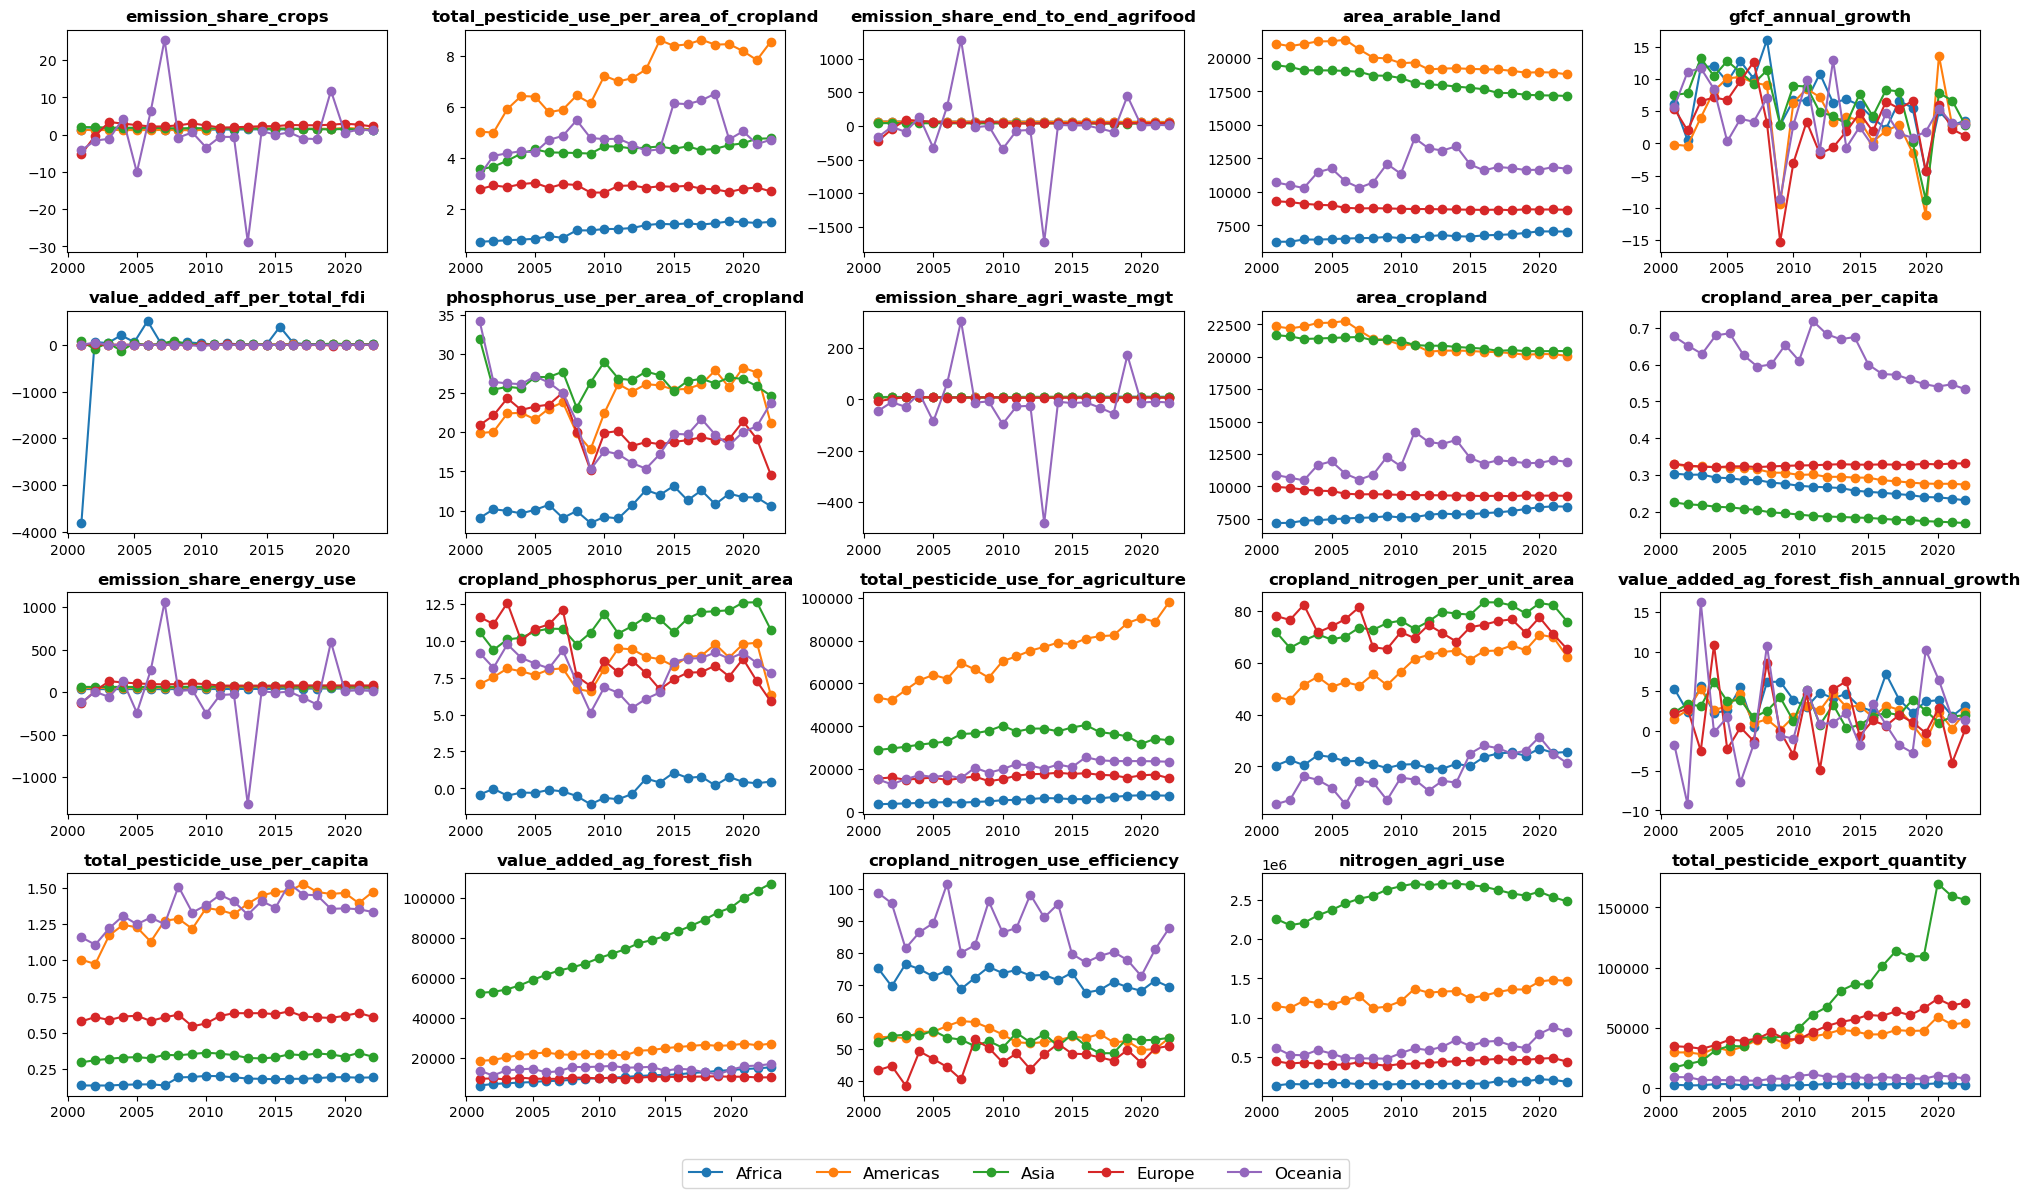

In [243]:
# Set up figure and axes grid
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20,12))

# Flatten 2D array of axes for easier indexing
axes = axes.flatten()

# Keep track of region labels for one legend
region_labels = set()

# Plotting time series for first 20 variables
for idx, col in enumerate(cols_area_dependent[0:20]):
    ax = axes[idx]

    # Aggregate and pivot the data
    data_agg = data.groupby(['year', 'region'])[col].mean().reset_index()

    data_pivot = data_agg.pivot(
        index = 'year',
        columns = 'region',
        values = col
    )

    # Plot each region's trend
    for region in data_pivot.columns:
        ax.plot(data_pivot.index, data_pivot[region], label=region, marker='o')
        region_labels.add(region)

    ax.set_title(col, fontweight='bold')

# Add a single legend below all sub-plots
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=len(region_labels), fontsize='large')

plt.tight_layout(rect=[0,0.05,1,1])
plt.show()

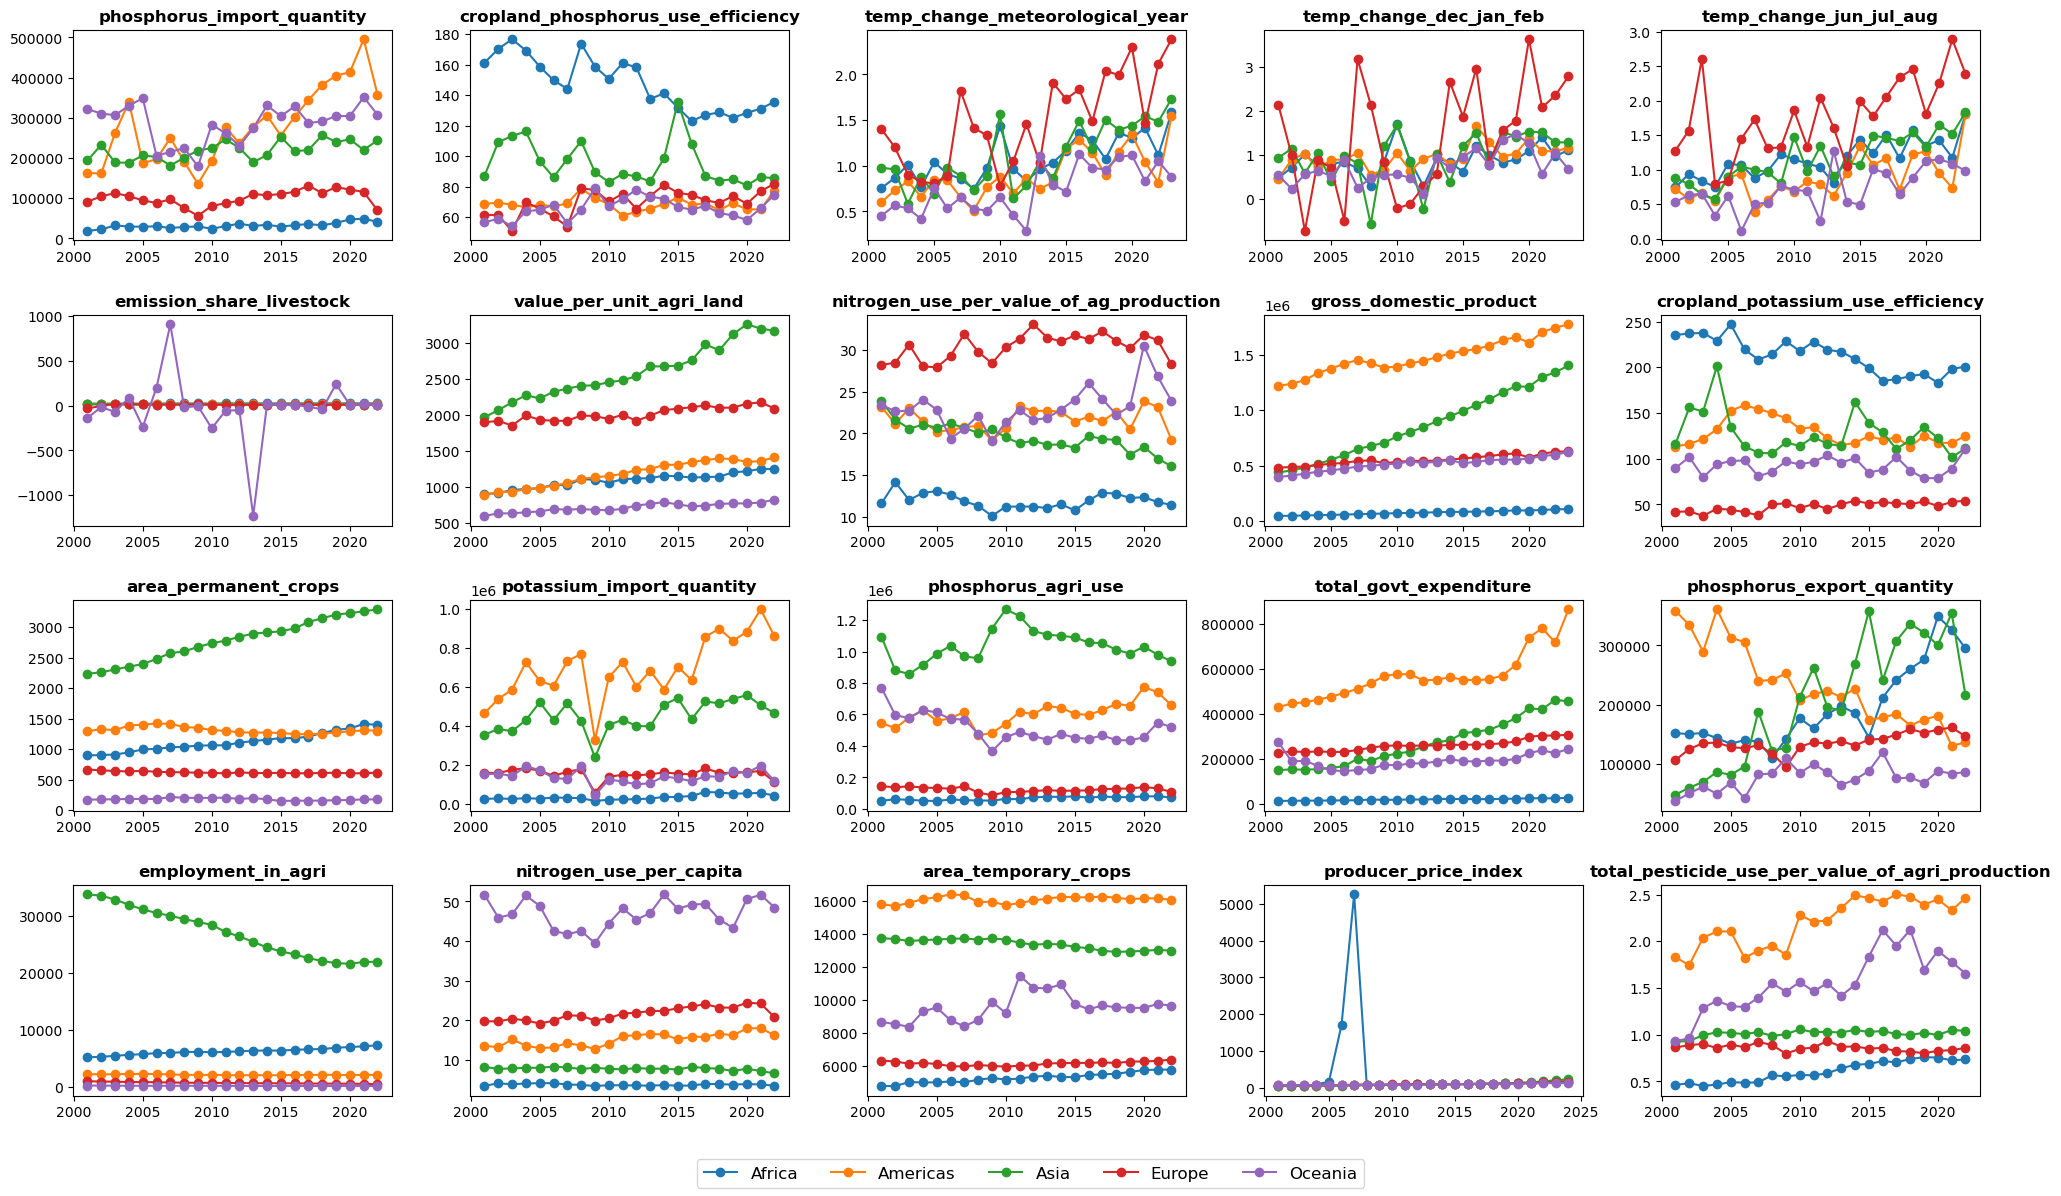

In [244]:
# Set up figure and axes grid
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20,12))

# Flatten the 2D array of axes for easier indexing
axes = axes.flatten()

# Keep track of the region labels for the legend
region_labels = set()

# Plotting time series for next twenty (20-40) variables
for idx, col in enumerate(cols_area_dependent[20:40]):
    ax = axes[idx]

    # Aggregate and pivot the data
    data_agg = data.groupby(['year', 'region'])[col].mean().reset_index()

    data_pivot = data_agg.pivot(index='year', columns='region', values=col)

    # Plot each region's trend
    for region in data_pivot.columns:
        ax.plot(data_pivot.index, data_pivot[region], label=region, marker='o')
        region_labels.add(region)

    ax.set_title(col, fontweight='bold')

# Add a single legend below all sub-plots
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=len(region_labels), fontsize='large')

plt.tight_layout(rect=[0,0.05,1,1])
plt.show()

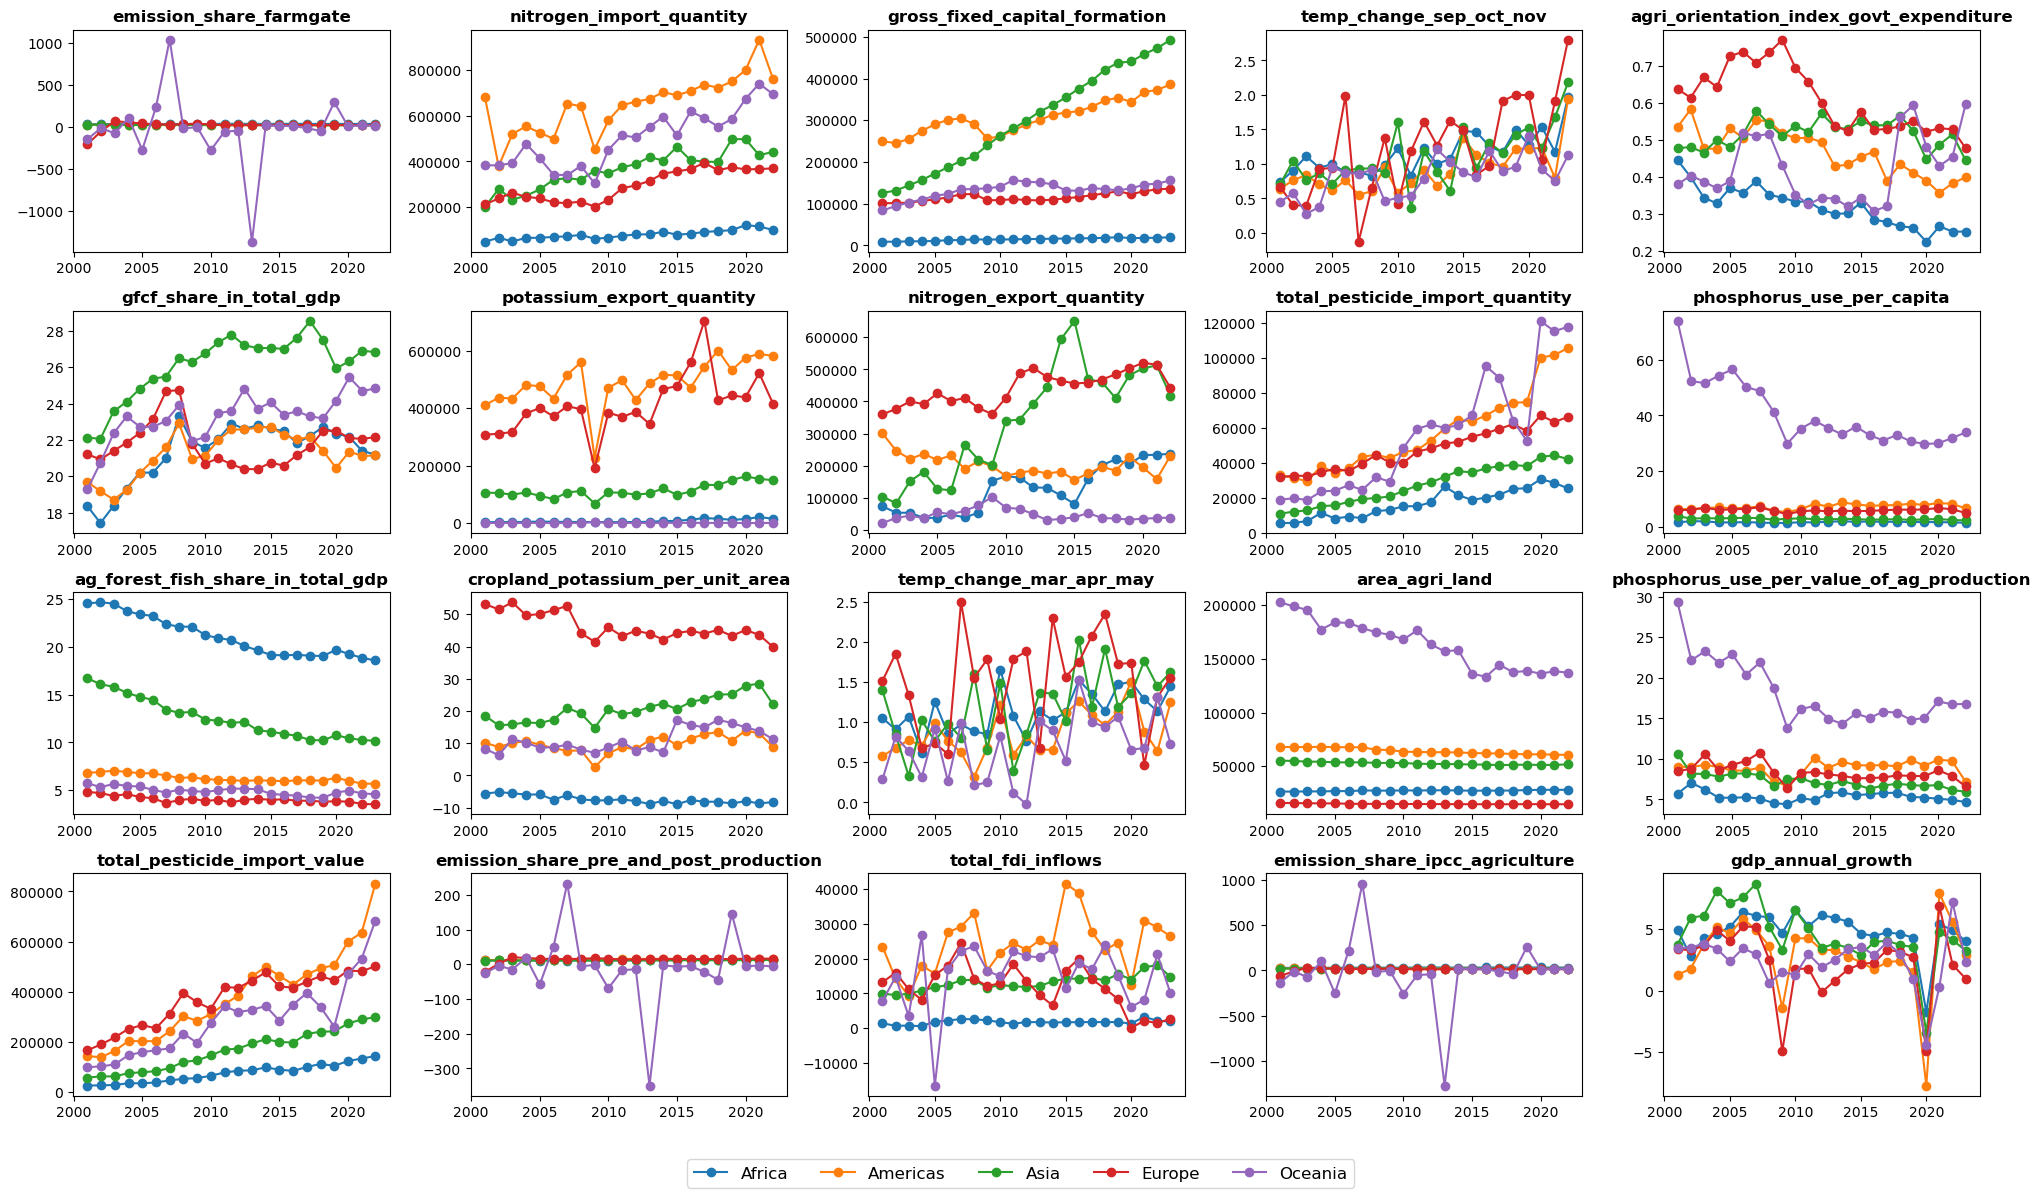

In [245]:
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20,12))

axes = axes.flatten()

region_labels = set()

for idx, col in enumerate(cols_area_dependent[40:60]):
    ax = axes[idx]

    data_agg = data.groupby(['year', 'region'])[col].mean().reset_index()

    data_pivot = data_agg.pivot(index='year', columns='region', values=col)

    for region in data_pivot.columns:
        ax.plot(data_pivot.index, data_pivot[region], label=region, marker='o')
        region_labels.add(region)

    ax.set_title(col, fontweight='bold')

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=len(region_labels), fontsize='large')

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()

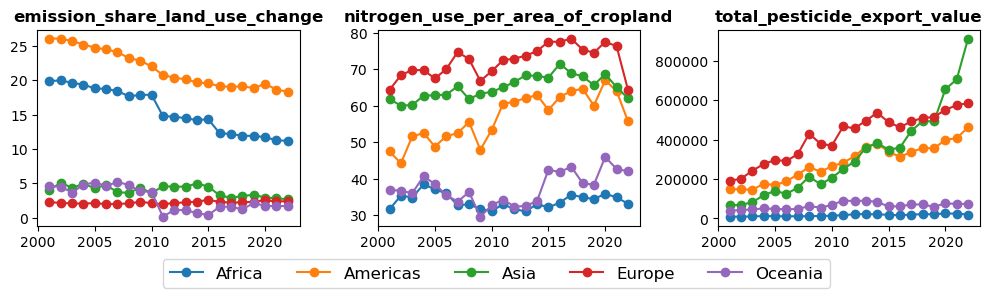

In [255]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10,3))

axes = axes.flatten()

region_labels = set()

for idx, col in enumerate(cols_area_dependent[60:]):
    ax = axes[idx]

    # Aggregate and pivot the data
    data_agg = data.groupby(['year', 'region'])[col].mean().reset_index()

    data_pivot = data_agg.pivot(index='year', columns='region', values=col)

    # Plot each region's trend
    for region in data_pivot.columns:
        ax.plot(data_pivot.index, data_pivot[region], label=region, marker='o')
        region_labels.add(region)

    ax.set_title(col, fontweight='bold')

# Hide unused plots
for j in range(idx+1, len(axes)):
    fig.delaxes(axes[j])

# Add a single legend below all subplots
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=len(region_labels), fontsize='large')

plt.tight_layout(rect=[0, 0.1, 1, 1])
plt.show()

In [283]:
df1 = df.groupby(['year', 'area'])['employment_in_agri'].mean().reset_index()
df1 = df1.pivot(index='year', columns='area', values='employment_in_agri')
df1

area,Afghanistan,Albania,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahrain,...,Ukraine,United Kingdom of Great Britain and Northern Ireland,United Republic of Tanzania,United States of America,Uruguay,Vanuatu,Viet Nam,Yemen,Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
2001,2772.29,535.99,NaN,NaN,1619.14,711.61,429.20,217.01,1539.60,NaN,...,4480.67,391.54,13535.50,2960.45,145.09,48.15,25203.55,1725.91,NaN,2897.70
2002,2896.36,529.36,NaN,NaN,1584.14,704.62,403.33,217.63,1557.33,NaN,...,4470.75,392.58,13693.14,2737.42,140.44,49.80,24974.21,1572.86,NaN,3009.71
2003,3093.88,524.94,NaN,NaN,1666.14,697.01,368.27,210.34,1490.78,NaN,...,4434.70,357.80,13824.35,2542.64,137.87,50.67,24338.59,1416.42,NaN,3121.43
2004,3194.41,516.40,NaN,NaN,1676.41,691.93,357.98,184.92,1541.60,NaN,...,4296.34,369.58,13899.97,2495.22,142.47,52.33,23937.83,1258.15,NaN,3205.39
2005,3283.41,503.29,NaN,NaN,1652.79,686.19,354.42,200.95,1547.99,NaN,...,4258.13,403.74,13906.76,2454.01,138.12,53.38,23498.33,1238.12,2145.02,3218.64
2006,3401.46,490.65,NaN,NaN,1634.33,683.27,346.37,203.91,1561.48,NaN,...,3891.68,400.32,13888.95,2463.05,151.09,54.33,22880.31,1223.01,2282.98,3234.80
2007,3370.45,471.74,NaN,NaN,1607.92,681.62,347.46,220.37,1488.12,NaN,...,3727.04,407.37,14087.76,2347.98,157.94,55.97,22543.18,1208.06,2424.47,3245.32
2008,3373.71,471.30,NaN,NaN,1570.77,676.39,346.63,221.26,1541.66,NaN,...,3531.86,325.23,14349.46,2402.88,160.26,57.12,22889.70,1195.41,2568.40,NaN
2009,3397.28,479.26,NaN,NaN,1544.44,687.71,349.98,225.43,1516.91,NaN,...,3400.52,328.86,14530.25,2336.27,169.32,58.42,23065.91,1173.70,2546.74,NaN


In [ ]:
data.groupby('area')['employment_in_agri'] \
    .apply(lambda x: x.isna().all()) \
    .loc[lambda x: x]

area
Antigua and Barbuda      True
Cook Islands             True
Grenada                  True
Saint Kitts and Nevis    True
Seychelles               True
Name: employment_in_agri, dtype: bool